# Lambda School Data Science - Unit 2 Sprint 1 Module 1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

# wrangle data
# split data
# establish baseline
# build model
# check metrics
# tune model
# communicate results

# I. Wrangle Data

In [16]:
DATA_PATH = '../data/'
# df = wrangle(DATA_PATH + 'condos/tribeca.csv')
df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv',
                 parse_dates=['SALE_DATE'],
                 index_col='SALE_DATE',
                 dtype={'ZIP_CODE':int, 'YEAR_BUILT':int})
print(df.shape)
print(df.info())
df.head()


(90, 8)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2019-01-03 to 2019-04-30
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NEIGHBORHOOD             90 non-null     object 
 1   BUILDING_CLASS_CATEGORY  90 non-null     object 
 2   ADDRESS                  90 non-null     object 
 3   APARTMENT_NUMBER         90 non-null     object 
 4   ZIP_CODE                 90 non-null     int64  
 5   GROSS_SQUARE_FEET        90 non-null     float64
 6   YEAR_BUILT               90 non-null     int64  
 7   SALE_PRICE               90 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.3+ KB
None


,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,ADDRESS,APARTMENT_NUMBER,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,,,,,
2019-01-03,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"181 HUDSON STREET, 6D",6D,10013,1840.0,1909,2800000
2019-01-07,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"10 LITTLE WEST STREET, 19A",19A,10004,1759.0,0,2650000
2019-01-09,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"30 LITTLE WEST STREET, 7G",7G,10004,1190.0,2005,1005000
2019-01-10,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"2 RIVER TERRACE, 4C",4C,0,1088.0,2006,1678000
2019-01-11,TRIBECA,13 CONDOS - ELEVATOR APARTMENTS,"380 RECTOR PLACE, 10A",10A,10280,873.0,0,1380000


Text(0.5, 1.0, 'Distribution of Condo Prices')

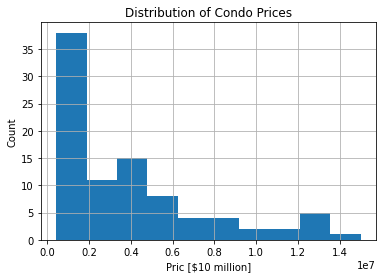

In [19]:
df['SALE_PRICE'].hist()
plt.xlabel('Pric [$10 million]')
plt.ylabel('Count')
plt.title('Distribution of Condo Prices')

Text(0.5, 1.0, 'Distribution of Condo Sizes')

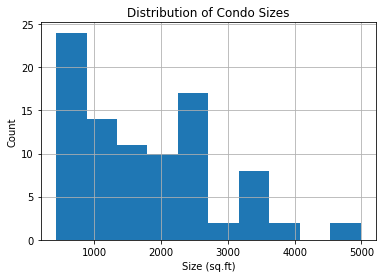

In [20]:
df['GROSS_SQUARE_FEET'].hist()
plt.xlabel('Size (sq.ft)')
plt.ylabel('Count')
plt.title('Distribution of Condo Sizes')

Text(0, 0.5, 'SALE_PRICE')

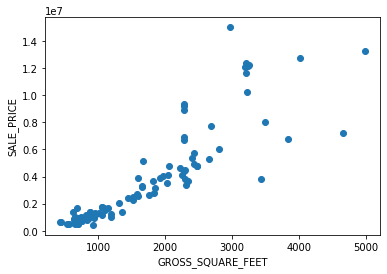

In [24]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')

# y axis is dependent (what we are trying to predict) target
# x axis is independent (what will help us make a prediction) feature

# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [28]:
target = 'SALE_PRICE'
y = df[target]
X = df[['GROSS_SQUARE_FEET']] # feature matrix always needs two dimensions
print(y)
print(y.shape)
print(X)
print(X.shape)

SALE_DATE
2019-01-03    2800000
2019-01-07    2650000
2019-01-09    1005000
2019-01-10    1678000
2019-01-11    1380000
               ...   
2019-04-24    5761259
2019-04-29    2600000
2019-04-29     605000
2019-04-30     960000
2019-04-30     975000
Name: SALE_PRICE, Length: 90, dtype: int64
(90,)
            GROSS_SQUARE_FEET
SALE_DATE                    
2019-01-03             1840.0
2019-01-07             1759.0
2019-01-09             1190.0
2019-01-10             1088.0
2019-01-11              873.0
...                       ...
2019-04-24             2429.0
2019-04-29             1601.0
2019-04-29              634.0
2019-04-30              939.0
2019-04-30              695.0

[90 rows x 1 columns]
(90, 1)


# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [40]:
# 
y_mean = y.mean()
print('Mean condo price', y_mean)

y_pred = [y_mean] * len(y)
# y_pred[0:10]
print('Baseline MAE: ', mean_absolute_error(y,y_pred))

Mean condo price 3928736.3666666667
Baseline MAE:  2783380.1977777784


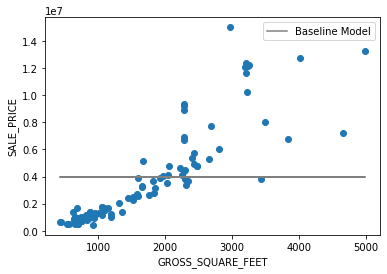

In [36]:
plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], y_pred, label='Baseline Model', color='grey')
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')
plt.legend()

# sigma (sum) abs(y-true - y-predict) / number of observations = mean absolute error

# IV. Build Model

In [41]:
# step 1. import predictor class
from sklearn.linear_model import LinearRegression

# step 2. instantiate your predictor
model = LinearRegression()

# step 3. fit your predictor on the (training) data
model.fit(X,y)

LinearRegression()

In [43]:
model.predict([[1000], [1500]])

/Users/jeffkang/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1571083.61456045, 3109307.44226995])

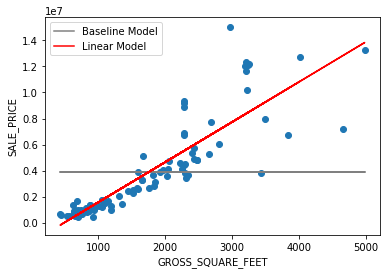

In [44]:
plt.scatter(X,y)
plt.plot(X, y_pred, label='Baseline Model', color='grey')
plt.plot(X, model.predict(X), label='Linear Model', color='red')
plt.xlabel('GROSS_SQUARE_FEET')
plt.ylabel('SALE_PRICE')
plt.legend()

# V. Check Metrics

In [47]:
print('Training MAE: ', mean_absolute_error(y, model.predict(X)))

Training MAE:  1176817.9930150746


# VI. Communicate Results

Plot model

In [50]:
type(model)
# beta_0, = intercept, beta_1 = coef or slope
f'PRICE = {model.intercept_} + {model.coef_[0]} * SQFT'

'PRICE = -1505364.0408585514 + 3076.4476554190023 * SQFT'

What are our beta coefficients?